In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv('../Data/data (1).csv')

In [175]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Data Preprocessing and Data Cleaning
- Handling Missing Values
- Handling Duplicates
- Handling Outliers
- Check Statistical Summary
- Check Uniques Values

In [176]:
df.duplicated().sum()

np.int64(0)

In [177]:
df.describe(include='number')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [178]:
df['date'] = pd.to_datetime(df['date'])

In [179]:
df['day'] = df['date'].dt.day_name()
df['month']= df['date'].dt.month_name()
df['year'] =  df['date'].dt.year

In [180]:
df['bathrooms'] = df['bathrooms'].astype(np.int32)
df['bedrooms'] = df['bedrooms'].astype(np.int32)

In [181]:
df.drop(columns = ['date'],inplace=True)

In [182]:
df.drop(columns=['street','statezip'],inplace=True)

In [183]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,day,month,year
0,313000.0,3,1,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA,Friday,May,2014
1,2384000.0,5,2,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA,Friday,May,2014
2,342000.0,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,USA,Friday,May,2014
3,420000.0,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA,Friday,May,2014
4,550000.0,4,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,USA,Friday,May,2014


## Observation
Note : Hati hati ada banyak outlier, challengenya adalah menghilangkan outlier tanpa mengurangi terlalu banyak data kita

In [184]:
df['price'].max()

np.float64(26590000.0)

In [185]:
df['price'].min()

np.float64(0.0)

In [186]:
df['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [187]:
df = df[~(df['price']>2590000.0)]
df['price'].describe()

count    4.585000e+03
mean     5.349604e+05
std      3.274183e+05
min      0.000000e+00
25%      3.220000e+05
50%      4.600000e+05
75%      6.500000e+05
max      2.560498e+06
Name: price, dtype: float64

## Visualisasiin untuk melihat dengan lebih baik (walaupun jelek)

<Figure size 1200x600 with 0 Axes>

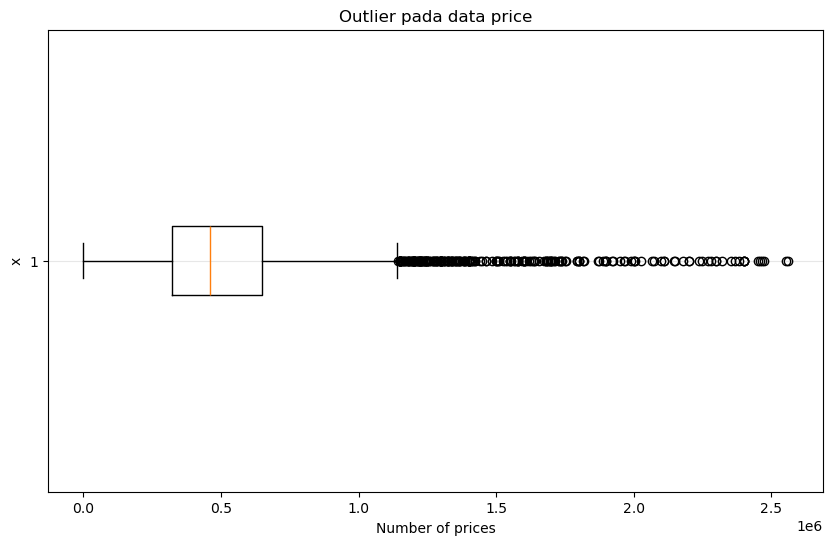

In [188]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Outlier pada data price')
plt.xlabel('Number of prices')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.3)
plt.show()


<Figure size 1200x600 with 0 Axes>

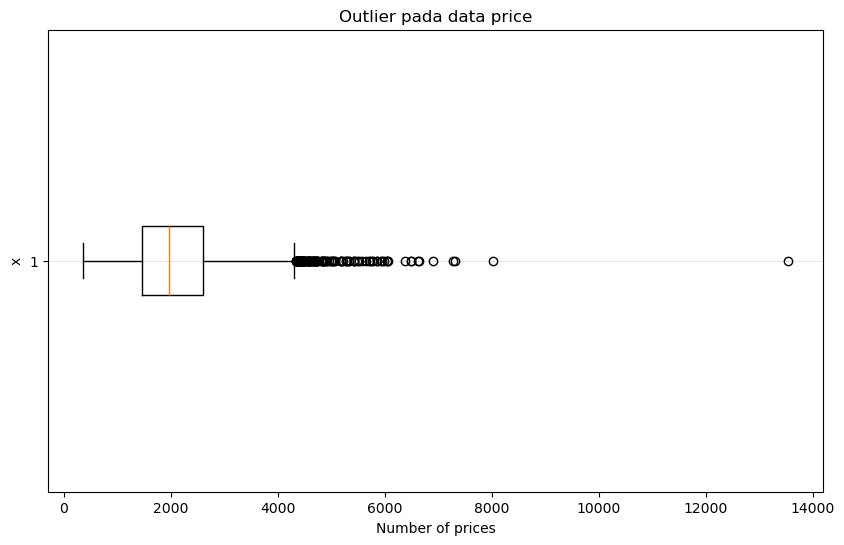

In [189]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(10, 6))
plt.boxplot(df['sqft_living'], vert=False)
plt.title('Outlier pada data price')
plt.xlabel('Number of prices')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.3)
plt.show()


In [190]:
df = df[~(df['sqft_living']>6000)]

<Figure size 1200x600 with 0 Axes>

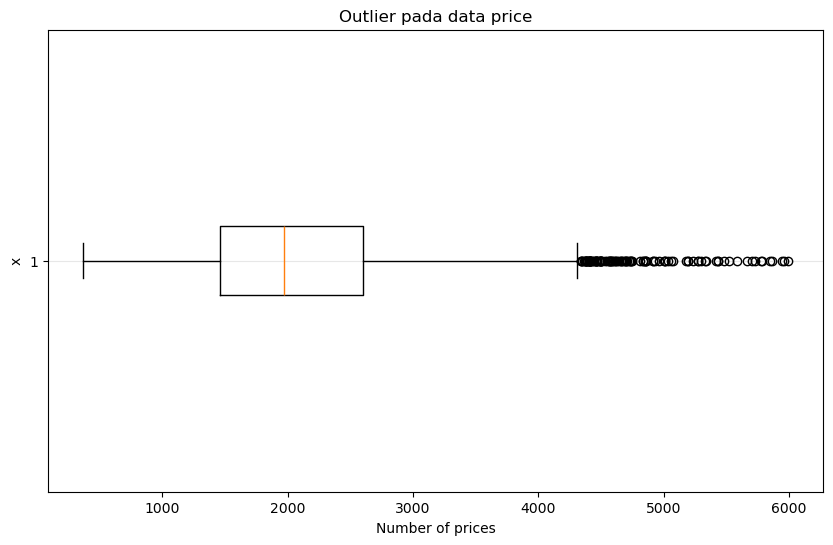

In [191]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(10, 6))
plt.boxplot(df['sqft_living'], vert=False)
plt.title('Outlier pada data price')
plt.xlabel('Number of prices')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [192]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,day,month,year
0,3.130000e+05,3,1,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA,Friday,May,2014
1,2.384000e+06,5,2,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA,Friday,May,2014
2,3.420000e+05,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,USA,Friday,May,2014
3,4.200000e+05,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA,Friday,May,2014
4,5.500000e+05,4,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,USA,Friday,May,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,USA,Wednesday,July,2014
4596,5.343333e+05,3,2,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,USA,Wednesday,July,2014
4597,4.169042e+05,3,2,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,USA,Wednesday,July,2014
4598,2.034000e+05,4,2,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,USA,Thursday,July,2014


## See? Data masih di 4500an, kita masih aman
Liat juga data yang lain dengan memvisualisasikannya

<Figure size 1200x600 with 0 Axes>

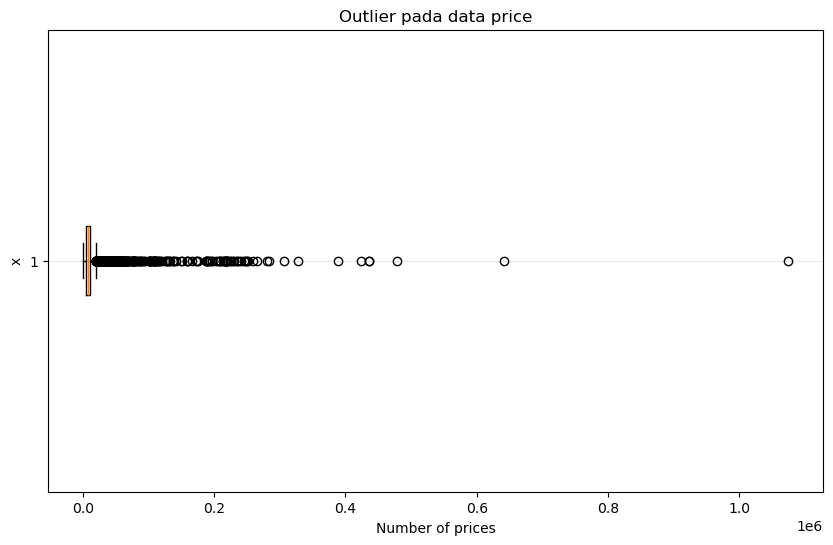

In [193]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(10, 6))
plt.boxplot(df['sqft_lot'], vert=False)
plt.title('Outlier pada data price')
plt.xlabel('Number of prices')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.3)
plt.show()

Seperti yang bisa kita liat diats, datanya miring ke kiri dan semua masih normal, gaada outlier.  
Kita bisa melakukan yang namanya transformasi logaritmik (liat code dibawah)

In [194]:
df['sqft_lot']=np.log(df['sqft_lot'])

<Figure size 1200x600 with 0 Axes>

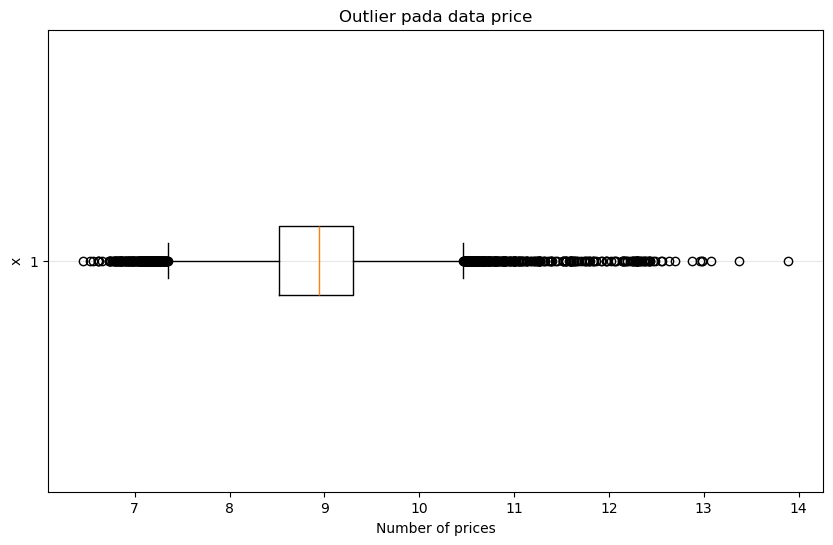

In [195]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(10, 6))
plt.boxplot(df['sqft_lot'], vert=False)
plt.title('Outlier pada data price')
plt.xlabel('Number of prices')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.3)
plt.show()

Jadi distribusi datanya bisa jadi lebih baik. Thanks to transformasi logaritmik

<Figure size 1200x600 with 0 Axes>

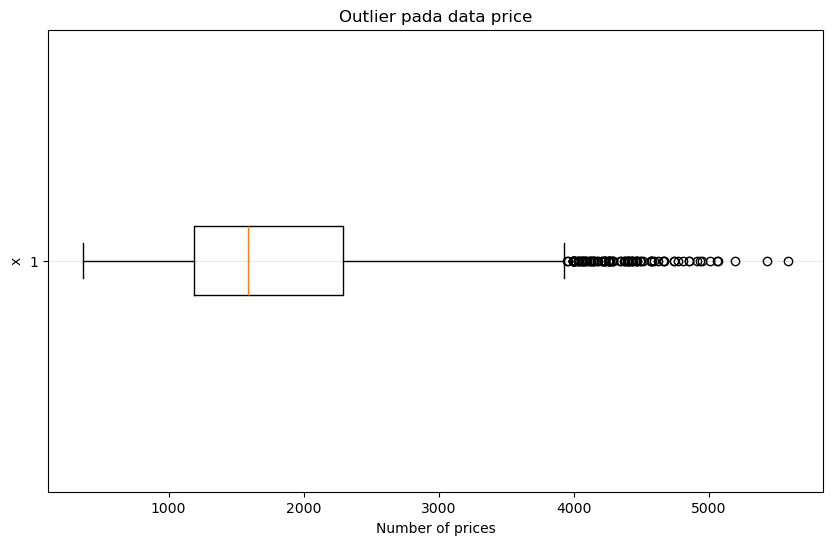

In [196]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(10, 6))
plt.boxplot(df['sqft_above'], vert=False)
plt.title('Outlier pada data price')
plt.xlabel('Number of prices')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.3)
plt.show()

Sebenarnya aman, tapi kalau mau lebih aman bisa lakuin seperti dibawah ini :

In [197]:
df=df[~(df['sqft_above']>4600)]

<Figure size 1200x600 with 0 Axes>

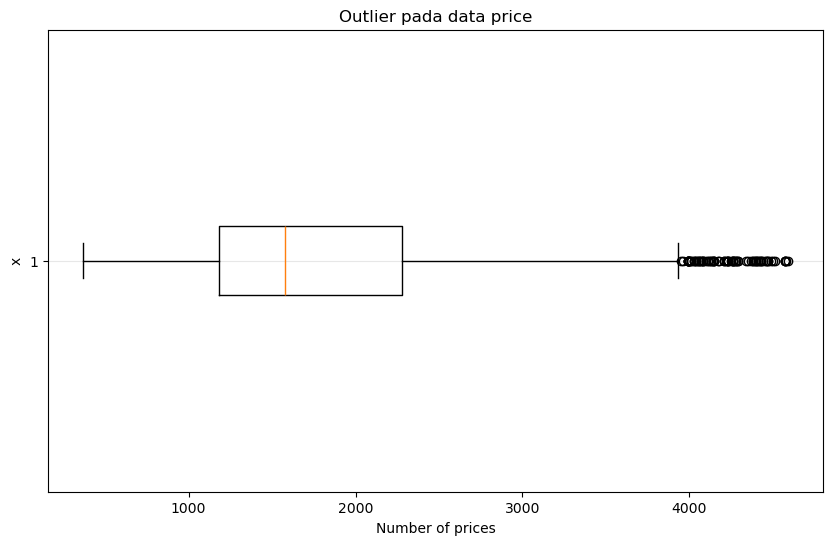

In [198]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(10, 6))
plt.boxplot(df['sqft_above'], vert=False)
plt.title('Outlier pada data price')
plt.xlabel('Number of prices')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [199]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,day,month,year
0,3.130000e+05,3,1,1340,8.976136,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA,Friday,May,2014
1,2.384000e+06,5,2,3650,9.110520,2.0,0,4,5,3370,280,1921,0,Seattle,USA,Friday,May,2014
2,3.420000e+05,3,2,1930,9.388235,1.0,0,0,4,1930,0,1966,0,Kent,USA,Friday,May,2014
3,4.200000e+05,3,2,2000,8.990940,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA,Friday,May,2014
4,5.500000e+05,4,2,1940,9.259131,1.0,0,0,4,1140,800,1976,1992,Redmond,USA,Friday,May,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1,1510,8.757784,1.0,0,0,4,1510,0,1954,1979,Seattle,USA,Wednesday,July,2014
4596,5.343333e+05,3,2,1460,8.932345,2.0,0,0,3,1460,0,1983,2009,Bellevue,USA,Wednesday,July,2014
4597,4.169042e+05,3,2,3010,8.855663,2.0,0,0,3,3010,0,2009,0,Renton,USA,Wednesday,July,2014
4598,2.034000e+05,4,2,2090,8.799360,1.0,0,0,3,1070,1020,1974,0,Seattle,USA,Thursday,July,2014


Yup, masih di 4500an

### Itu tadi untuk numerical. Sekarang gas untuk categorical

In [200]:
df['bedrooms'].value_counts()

bedrooms
3    2030
4    1511
2     566
5     336
6      57
1      38
7      11
8       2
9       1
0       1
Name: count, dtype: int64

Bedrooms = 0 itu ga ngotak, jadi hapus. Supaya data jadi lebih normal distribusinya, pakai bedrooms nya dari 1 - 6 aja. sisanya hapus

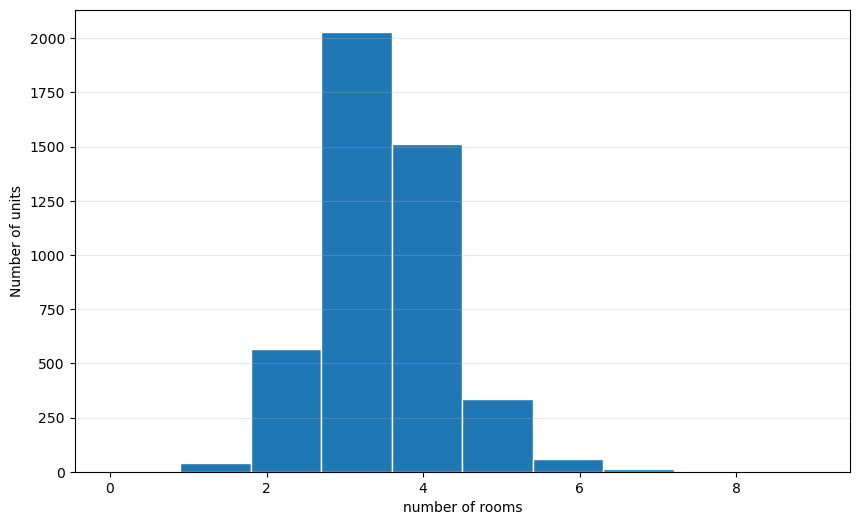

In [201]:
plt.figure(figsize=(10, 6))
plt.hist(df['bedrooms'], edgecolor='white')
plt.xlabel('number of rooms')
plt.ylabel('Number of units')
plt.grid(axis='y', alpha=0.3)

In [202]:
df = df[~(df['bedrooms']>6)]
df = df[~(df['bedrooms']==0)]

In [203]:
df['bedrooms'].value_counts()

bedrooms
3    2030
4    1511
2     566
5     336
6      57
1      38
Name: count, dtype: int64

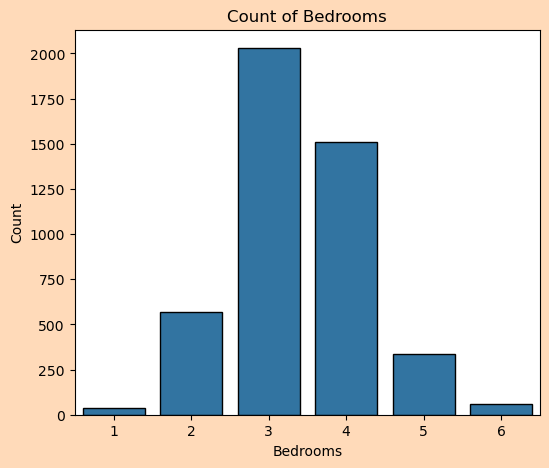

In [204]:
fig, axis = plt.subplots(figsize=(6, 5))
fig.patch.set_facecolor('#FFDAB9')  # Peach Puff background
# Count Plot
sns.countplot(x='bedrooms', data=df, ax=axis, edgecolor='black')
axis.set_title("Count of Bedrooms")
axis.set_xlabel("Bedrooms")
axis.set_ylabel("Count")
axis.set_facecolor('#FFFFFF')  # Soft inner background
plt.show()

In [205]:
df['bathrooms'].value_counts()

bathrooms
2    2305
1    1666
3     484
4      59
0      17
5       7
Name: count, dtype: int64

In [206]:
df = df[~(df['bathrooms']==0)]

In [207]:
df['bathrooms'].value_counts()

bathrooms
2    2305
1    1666
3     484
4      59
5       7
Name: count, dtype: int64

In [208]:
df['city'].value_counts()

city
Seattle                1554
Renton                  291
Bellevue                273
Redmond                 230
Kirkland                185
Issaquah                183
Kent                    183
Sammamish               175
Auburn                  174
Federal Way             146
Shoreline               122
Woodinville             112
Maple Valley             96
Mercer Island            82
Burien                   72
Snoqualmie               68
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         35
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   27
Enumclaw                 27
Carnation                19
Normandy Park            18
Clyde Hill               10
Black Diamond             9
Fall City                 9
Medina                    7
Ravensdale                7
Pacific        

nah ini agak tricky. Bisa kita lakukan seperti ini, city dengan value count dibawah 50 kita gabung menjadi "other"

In [209]:
a = df['city'].value_counts()

In [210]:
b = a[a < 50]
df['city'] = df['city'].apply(lambda x: 'other' if x in b.index else x)

In [211]:
df['city'].value_counts()

city
Seattle          1554
other             401
Renton            291
Bellevue          273
Redmond           230
Kirkland          185
Kent              183
Issaquah          183
Sammamish         175
Auburn            174
Federal Way       146
Shoreline         122
Woodinville       112
Maple Valley       96
Mercer Island      82
Burien             72
Snoqualmie         68
Kenmore            66
Des Moines         58
North Bend         50
Name: count, dtype: int64

In [212]:
df['floors'].value_counts()

floors
1.0    2150
2.0    1764
1.5     441
3.0     126
2.5      39
3.5       1
Name: count, dtype: int64

In [213]:
df['floors']=df['floors'].astype(int)

In [214]:
df['floors'].value_counts()

floors
1    2591
2    1803
3     127
Name: count, dtype: int64

In [215]:
df['yr_renovated'].value_counts()

yr_renovated
0       2689
2000     165
2003     146
2001     107
2009     106
2005      94
2004      74
2014      71
2006      67
2013      61
1923      57
1994      55
1989      54
2011      53
2012      45
1988      42
2008      42
1999      41
2002      41
1983      41
1998      40
1993      39
1912      33
1992      32
1979      32
2010      30
1985      29
1997      28
1982      22
1996      20
1972      17
1990      16
1956      15
1963      12
1969      11
1968       9
1984       9
1970       9
1954       8
1945       7
2007       6
1974       6
1934       6
1971       5
1958       5
1986       5
1978       3
1980       2
1995       2
1955       2
1977       1
1913       1
1991       1
1948       1
1966       1
1960       1
1987       1
1953       1
1981       1
1975       1
Name: count, dtype: int64

In [216]:
a=df['yr_renovated'].value_counts()
b=a[a!=0]

In [217]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

artinya adalah 0 kalau tidak pernah di renovasi, 1 kalau pernah di renovasi

In [218]:
df['yr_renovated'].value_counts()

yr_renovated
0    2689
1    1832
Name: count, dtype: int64

In [219]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,day,month,year
0,3.130000e+05,3,1,1340,8.976136,1,0,0,3,1340,0,1955,1,Shoreline,USA,Friday,May,2014
1,2.384000e+06,5,2,3650,9.110520,2,0,4,5,3370,280,1921,0,Seattle,USA,Friday,May,2014
2,3.420000e+05,3,2,1930,9.388235,1,0,0,4,1930,0,1966,0,Kent,USA,Friday,May,2014
3,4.200000e+05,3,2,2000,8.990940,1,0,0,4,1000,1000,1963,0,Bellevue,USA,Friday,May,2014
4,5.500000e+05,4,2,1940,9.259131,1,0,0,4,1140,800,1976,1,Redmond,USA,Friday,May,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1,1510,8.757784,1,0,0,4,1510,0,1954,1,Seattle,USA,Wednesday,July,2014
4596,5.343333e+05,3,2,1460,8.932345,2,0,0,3,1460,0,1983,1,Bellevue,USA,Wednesday,July,2014
4597,4.169042e+05,3,2,3010,8.855663,2,0,0,3,3010,0,2009,0,Renton,USA,Wednesday,July,2014
4598,2.034000e+05,4,2,2090,8.799360,1,0,0,3,1070,1020,1974,0,Seattle,USA,Thursday,July,2014


# Feature Engineering

Just ask chatgpt to list features that you can gain based on the data that you have

In [220]:
# Total square footage
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

# House age at time of sale
df['house_age'] = df['year'] - df['yr_built']

In [221]:
# Years since renovation
df['since_renovated'] = df.apply(lambda x: x['year'] - x['yr_renovated'] if x['yr_renovated'] > 0 else 0, axis=1)

# Bathrooms per bedroom
df['bath_per_bed'] = df.apply(lambda x: x['bathrooms'] / x['bedrooms'] if x['bedrooms'] != 0 else 0, axis=1)

In [222]:
# Lot-to-living area ratio
df['lot_living_ratio'] = df.apply(lambda x: x['sqft_lot'] / x['sqft_living'] if x['sqft_living'] != 0 else 0, axis=1)

# Has basement (binary)
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)


In [223]:
# Total rooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Average room size
df['avg_room_size'] = df.apply(lambda x: x['sqft_living'] / (x['bedrooms'] + x['bathrooms']) if (x['bedrooms'] + x['bathrooms']) != 0 else 0, axis=1)

In [224]:
df['above_per_floor'] = df.apply(lambda x: x['sqft_above'] / x['floors'] if x['floors'] != 0 else 0, axis=1)

In [225]:
df['price_per_sqft'] = df.apply(lambda x: x['price'] / x['sqft_living'] if x['sqft_living'] != 0 else 0, axis=1)

# is recently renovated (last 10 years)
df['recently_renovated'] = df.apply(lambda x: 1 if x['yr_renovated'] != 0 and (x['year'] - x['yr_renovated']) <= 10 else 0, axis=1)

In [226]:
df['basement_ratio'] = df.apply(lambda x: x['sqft_basement'] / x['total_sqft'] if x['total_sqft'] != 0 else 0, axis=1)

# Floor × bedrooms
df['floor_room_capacity'] = df['floors'] * df['bedrooms']

In [227]:
df['living_to_total_ratio'] = df.apply(lambda x: x['sqft_living'] / x['total_sqft'] if x['total_sqft'] != 0 else 0, axis=1)

In [228]:
df['age_when_renovated'] = df.apply(lambda x: x['yr_renovated'] - x['yr_built'] if x['yr_renovated'] > 0 else 0, axis=1)

In [229]:
df['loc_cond_index'] = df['view'] * df['condition']

In [230]:
df['living_per_floor'] = df.apply(lambda x: x['sqft_living'] / x['floors'] if x['floors'] != 0 else 0, axis=1)

In [231]:
df['lot_total_ratio'] = df.apply(lambda x: x['sqft_lot'] / x['total_sqft'] if x['total_sqft'] != 0 else 0, axis=1)

In [232]:
# Condition per bedroom
df['cond_per_bedroom'] = df.apply(lambda x: x['condition'] / x['bedrooms'] if x['bedrooms'] != 0 else 0, axis=1)

# View per dollar
df['view_price_ratio'] = df.apply(lambda x: x['view'] / x['price'] if x['price'] != 0 else 0, axis=1)

In [233]:
cat_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(include='number').columns.tolist()
num_col.remove('price')

In [234]:
cat_col

['city', 'country', 'day', 'month']

In [235]:
df.isnull().sum()

price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
view                     0
condition                0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
city                     0
country                  0
day                      0
month                    0
year                     0
total_sqft               0
house_age                0
since_renovated          0
bath_per_bed             0
lot_living_ratio         0
has_basement             0
total_rooms              0
avg_room_size            0
above_per_floor          0
price_per_sqft           0
recently_renovated       0
basement_ratio           0
floor_room_capacity      0
living_to_total_ratio    0
age_when_renovated       0
loc_cond_index           0
living_per_floor         0
lot_total_ratio          0
cond_per_bedroom         0
v

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4521 entries, 0 to 4599
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  4521 non-null   float64
 1   bedrooms               4521 non-null   int32  
 2   bathrooms              4521 non-null   int32  
 3   sqft_living            4521 non-null   int64  
 4   sqft_lot               4521 non-null   float64
 5   floors                 4521 non-null   int64  
 6   waterfront             4521 non-null   int64  
 7   view                   4521 non-null   int64  
 8   condition              4521 non-null   int64  
 9   sqft_above             4521 non-null   int64  
 10  sqft_basement          4521 non-null   int64  
 11  yr_built               4521 non-null   int64  
 12  yr_renovated           4521 non-null   int64  
 13  city                   4521 non-null   object 
 14  country                4521 non-null   object 
 15  day      

In [237]:
df = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4521 entries, 0 to 4599
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  4521 non-null   float64
 1   bedrooms               4521 non-null   int32  
 2   bathrooms              4521 non-null   int32  
 3   sqft_living            4521 non-null   int64  
 4   sqft_lot               4521 non-null   float64
 5   floors                 4521 non-null   int64  
 6   waterfront             4521 non-null   int64  
 7   view                   4521 non-null   int64  
 8   condition              4521 non-null   int64  
 9   sqft_above             4521 non-null   int64  
 10  sqft_basement          4521 non-null   int64  
 11  yr_built               4521 non-null   int64  
 12  yr_renovated           4521 non-null   int64  
 13  year                   4521 non-null   int32  
 14  total_sqft             4521 non-null   int64  
 15  house_age

# Modeling

In [239]:
X= df.drop(columns=['price'])
Y= df['price']

In [240]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4521 entries, 0 to 4599
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               4521 non-null   int32  
 1   bathrooms              4521 non-null   int32  
 2   sqft_living            4521 non-null   int64  
 3   sqft_lot               4521 non-null   float64
 4   floors                 4521 non-null   int64  
 5   waterfront             4521 non-null   int64  
 6   view                   4521 non-null   int64  
 7   condition              4521 non-null   int64  
 8   sqft_above             4521 non-null   int64  
 9   sqft_basement          4521 non-null   int64  
 10  yr_built               4521 non-null   int64  
 11  yr_renovated           4521 non-null   int64  
 12  year                   4521 non-null   int32  
 13  total_sqft             4521 non-null   int64  
 14  house_age              4521 non-null   int64  
 15  since_ren

In [241]:
Y.isna().sum()

np.int64(0)

In [242]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [243]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "SVR": SVR()
}

In [247]:
pipelines = []

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model),
    ])
    print(f'Pipeline for: {name}')
    display(pipe)
    pipelines.append((name, pipe))

Pipeline for: LinearRegression


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

Pipeline for: DecisionTree


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])

Pipeline for: RandomForest


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

Pipeline for: SVR


Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [248]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error

for name, model in models.items():
    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    model_pipeline.fit(x_train, y_train)
    y_pred = model_pipeline.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    print(f"{name} -> R²: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

LinearRegression -> R²: 0.9072, MAE: 55827.7430, MSE: 8793104537.2604, RMSE: 93771.5551
DecisionTree -> R²: 0.9580, MAE: 22726.8643, MSE: 3984727072.3407, RMSE: 63124.6946
RandomForest -> R²: 0.9807, MAE: 9179.4662, MSE: 1829099144.5557, RMSE: 42767.9687
SVR -> R²: -0.0399, MAE: 206404.7508, MSE: 98585504746.3378, RMSE: 313983.2874
